In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Initial Setup: Load Data and Basic Overview

In [ ]:
df = pd.read_csv('cleaned_data.csv')

In [33]:
print("\n--- Dataset Overview ---")
print("Data Head:")
print(df.head())
print("\nData Info:")
df.info()
print("\nMissing Values (Columns with >0 missing values):")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


--- Dataset Overview ---
Data Head:
   Unnamed: 0  isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0           0        0          86400            68.5         W  13926  361.0   
1           1        0          86401            29.0         W   2755  404.0   
2           2        0          86469            59.0         W   4663  490.0   
3           3        0          86499            50.0         W  18132  567.0   
4           4        0          86506            50.0         H   4497  514.0   

   card3       card4  card5  ...         4         5         6         7  \
0  150.0    discover  142.0  ... -1.653196 -0.139864 -0.731344  0.299316   
1  150.0  mastercard  102.0  ... -1.486360 -0.065914  1.490355 -1.655177   
2  150.0        visa  166.0  ... -1.289957 -1.210241  0.156661  0.202122   
3  150.0  mastercard  117.0  ...  0.554579  1.270003  0.994639 -1.923996   
4  150.0  mastercard  102.0  ... -1.512392 -1.440297  0.167592  0.707883   

          8        

# 1. isFraud Distribution & Correlation

Goal: Understand the target variable's imbalance and its initial relationships with other features.
EDA Ideas:
- value_counts() for isFraud.
- Correlation matrix (heatmap) for a subset of numerical columns including isFraud.
- Pairplot for a very small, carefully selected subset of numerical columns, colored by isFraud (sampled for performance).


--- EDA: isFraud Distribution & Correlation ---

1.1 isFraud Distribution:
isFraud
0    96.530035
1     3.469965
Name: proportion, dtype: float64


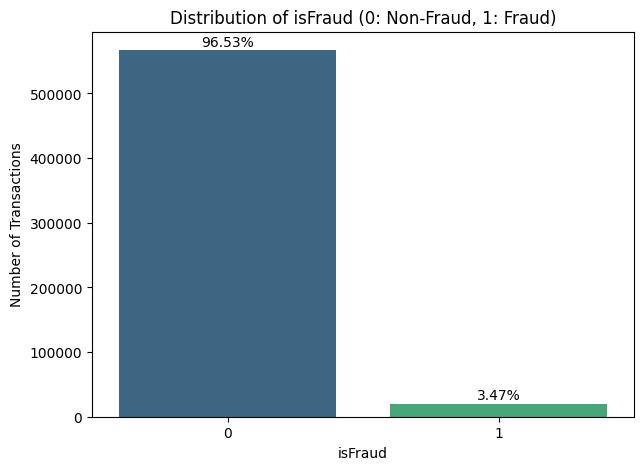


1.2 Correlation Matrix (Subset of Key Numerical Columns):


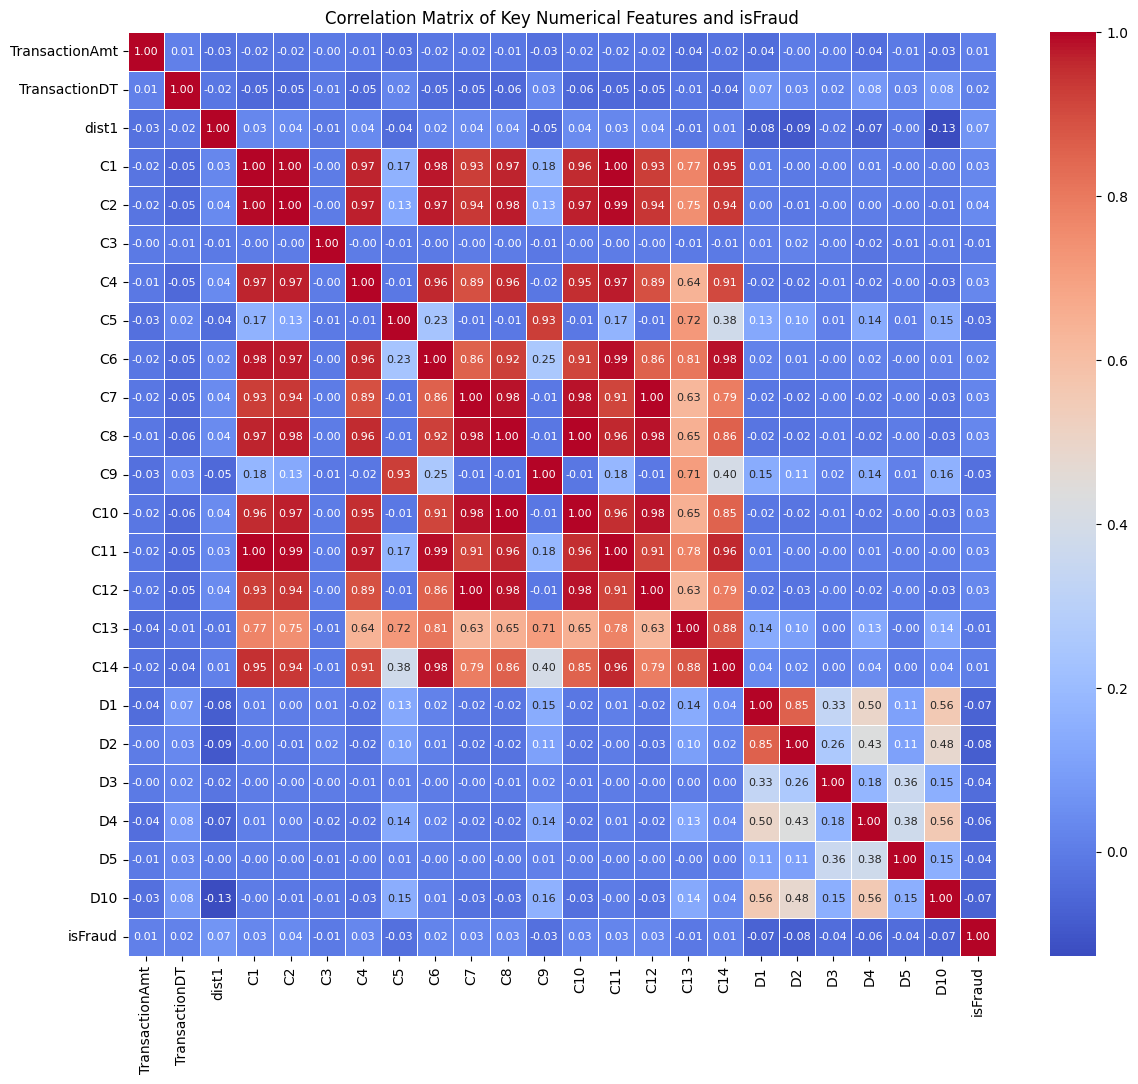

In [4]:
print("\n" + "="*50)
print("--- EDA: isFraud Distribution & Correlation ---")
print("="*50)

# 1.1 Distribution of isFraud
print("\n1.1 isFraud Distribution:")
fraud_distribution = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_distribution)

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='isFraud', data=df, palette='viridis')
plt.title('Distribution of isFraud (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xlabel('isFraud')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percent = f"{(count/total)*100:.2f}%"
    ax.text(p.get_x() + p.get_width()/2., count + total * 0.01, percent, ha='center', fontsize=10)

plt.show()


# 1.2 Correlation with other columns
# Select a subset of numerical columns for correlation matrix.
# Excluding V-columns due to their large number, anonymized nature, and the note about PCA.
numerical_cols_for_corr = ['TransactionAmt', 'TransactionDT', 'dist1'] + \
                         [f'C{i}' for i in range(1, 15) if f'C{i}' in df.columns] + \
                         [f'D{i}' for i in range(1, 6) if f'D{i}' in df.columns] + \
                         (['D10'] if 'D10' in df.columns else [])

# Ensure all selected columns exist in the DataFrame
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col in df.columns]

if 'isFraud' not in numerical_cols_for_corr:
    numerical_cols_for_corr.append('isFraud')

print("\n1.2 Correlation Matrix (Subset of Key Numerical Columns):")
if len(numerical_cols_for_corr) > 1:
    corr_matrix = df[numerical_cols_for_corr].corr()
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Correlation Matrix of Key Numerical Features and isFraud')
    plt.show()
else:
    print("Not enough numerical columns to create a correlation matrix.")

# 2. TransactionDT & TransactionAmt

Goal: Understand the monetary value and temporal aspects of transactions, especially concerning fraud.

EDA Ideas:
- Distribution of TransactionAmt (overall and by isFraud).
- Time series plots: total transactions over time, fraudulent transactions over time, and fraud ratio over time.


--- EDA: TransactionDT & TransactionAmt ---

2.1 Distribution of TransactionAmt:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


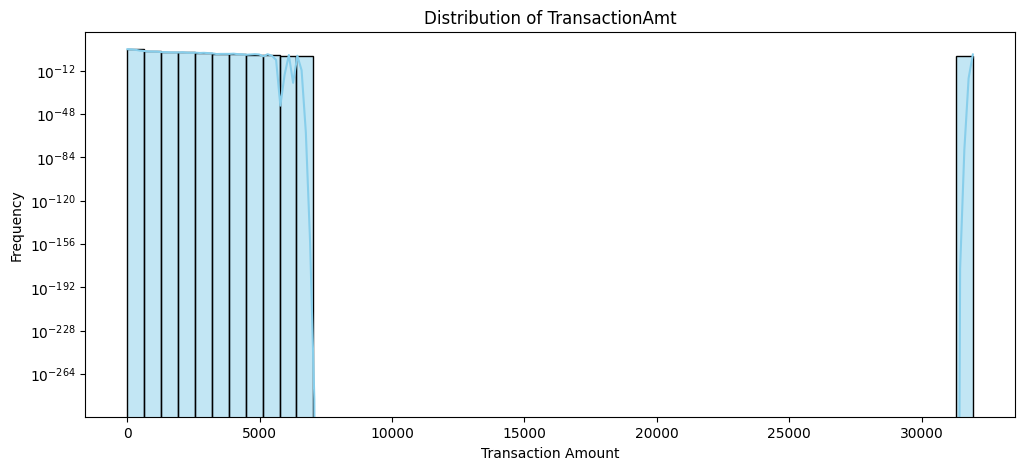

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


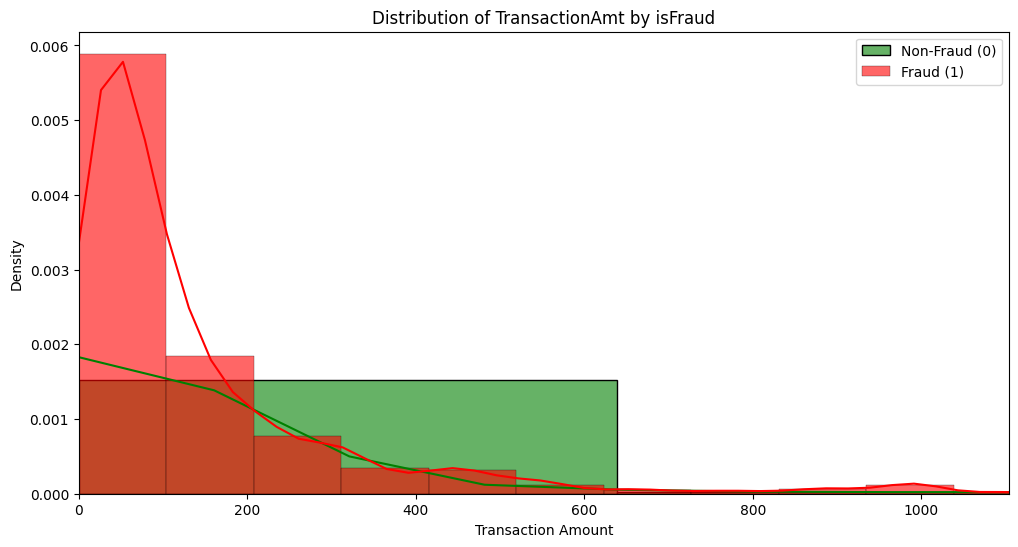

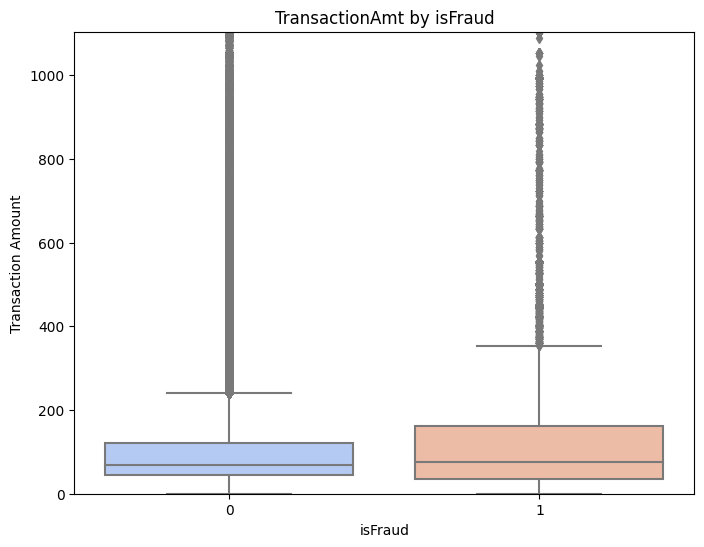

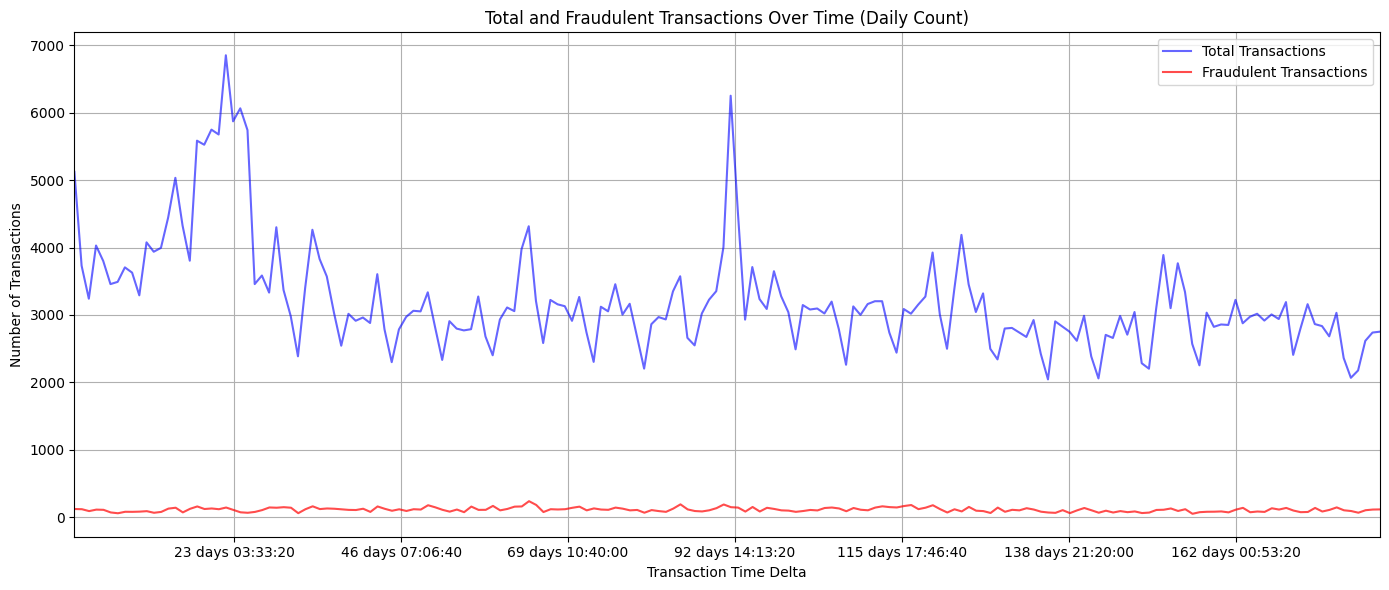

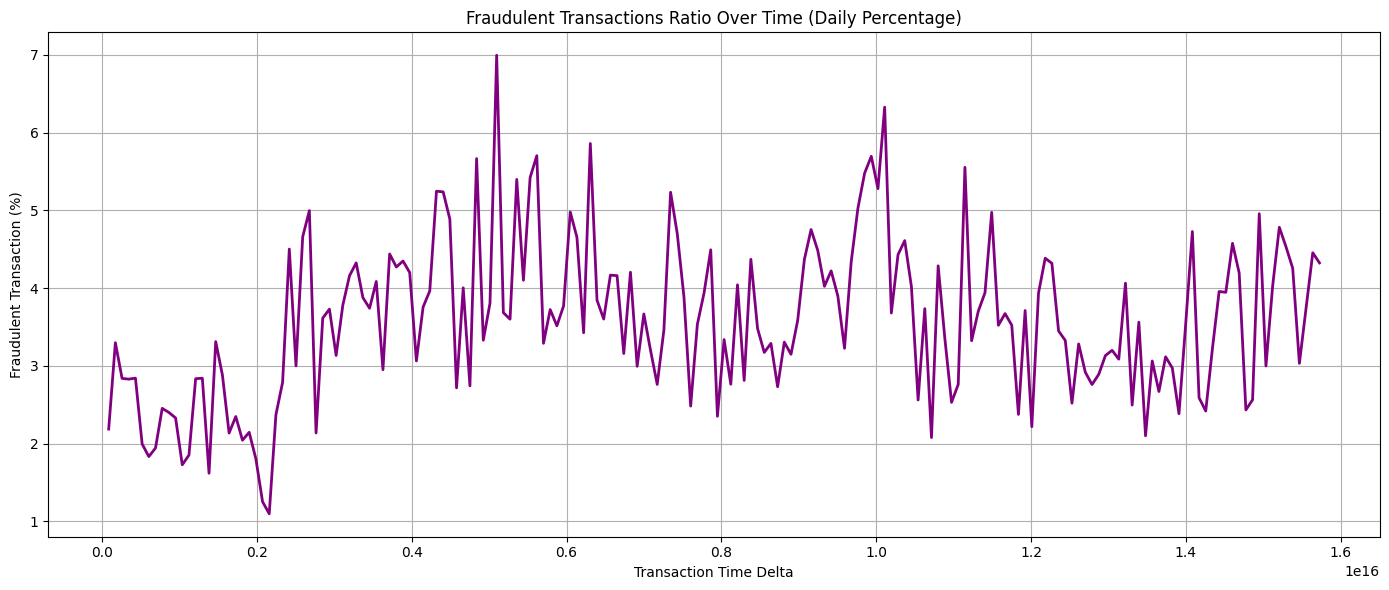

In [6]:
print("\n" + "="*50)
print("--- EDA: TransactionDT & TransactionAmt ---")
print("="*50)

# 2.1 Distribution of TransactionAmt
print("\n2.1 Distribution of TransactionAmt:")
plt.figure(figsize=(12, 5))
sns.histplot(df['TransactionAmt'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of TransactionAmt')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale for y-axis to better see distribution of smaller amounts
plt.show()

# Distribution of TransactionAmt by isFraud
plt.figure(figsize=(12, 6))
sns.histplot(df[df['isFraud'] == 0]['TransactionAmt'], bins=50, kde=True, color='green', label='Non-Fraud (0)', stat='density', alpha=0.6)
sns.histplot(df[df['isFraud'] == 1]['TransactionAmt'], bins=50, kde=True, color='red', label='Fraud (1)', stat='density', alpha=0.6)
plt.title('Distribution of TransactionAmt by isFraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
# Limit x-axis to 99th percentile to avoid long tails distorting the view
plt.xlim(0, df['TransactionAmt'].quantile(0.99))
plt.show()

# Box plot for TransactionAmt by isFraud
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='TransactionAmt', data=df, palette='coolwarm')
plt.title('TransactionAmt by isFraud')
plt.xlabel('isFraud')
plt.ylabel('Transaction Amount')
# Limit y-axis for better visibility
plt.ylim(0, df['TransactionAmt'].quantile(0.99))
plt.show()


# 2.2 Transactions over time (TransactionDT)
import matplotlib.pyplot as plt
import pandas as pd

# Đặt chỉ mục thời gian từ TransactionDT
df_time_indexed = df.set_index(pd.to_timedelta(df['TransactionDT'], unit='s'))

# Tạo biểu đồ
plt.figure(figsize=(14, 6))

# Tổng số giao dịch
df_time_indexed.resample('D')['isFraud'].count().plot(label='Total Transactions', color='blue', alpha=0.6)

# Số giao dịch gian lận
df_time_indexed[df_time_indexed['isFraud'] == 1].resample('D')['isFraud'].count().plot(label='Fraudulent Transactions', color='red', alpha=0.7)

# Tùy chỉnh hiển thị
plt.title('Total and Fraudulent Transactions Over Time (Daily Count)')
plt.xlabel('Transaction Time Delta')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tính toán số giao dịch và giao dịch gian lận mỗi ngày
daily_counts = df_time_indexed.resample('D').agg(
    total_transactions=('isFraud', 'count'),
    fraud_transactions=('isFraud', lambda x: (x == 1).sum())
).reset_index()

# Tính tỷ lệ phần trăm giao dịch gian lận
daily_counts['fraud_ratio_percent'] = (daily_counts['fraud_transactions'] / daily_counts['total_transactions']) * 100

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(daily_counts['TransactionDT'], daily_counts['fraud_ratio_percent'], color='purple', linestyle='-', linewidth=2)
plt.title('Fraudulent Transactions Ratio Over Time (Daily Percentage)')
plt.xlabel('Transaction Time Delta')
plt.ylabel('Fraudulent Transaction (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



# 3. ProductCD

Goal: Examine the distribution of product categories and their potential link to fraud or transaction amounts.

EDA Ideas:
- Distribution of ProductCD.
- TransactionAmt distribution per ProductCD (e.g., box plots).
isFraud distribution per ProductCD (e.g., stacked bar chart or count plot with hue).


--- EDA: ProductCD ---

3.1 Distribution of ProductCD:
ProductCD
W    439654
C     65437
R     37699
H     33023
S     11628
Name: count, dtype: int64


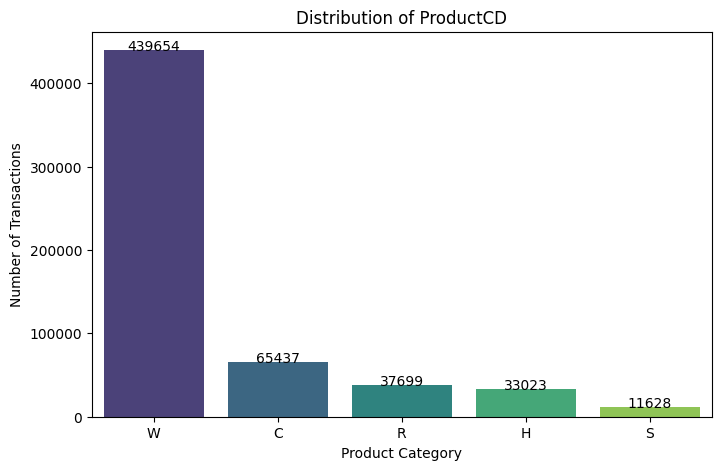


3.2 TransactionAmt by ProductCD:


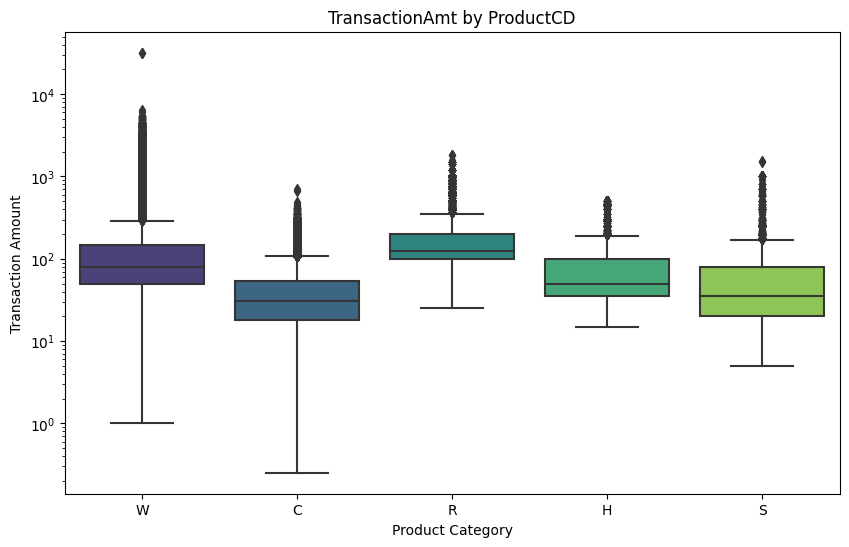


3.3 isFraud distribution by ProductCD:
isFraud            0          1
ProductCD                      
C          88.187111  11.812889
H          95.236653   4.763347
R          96.217406   3.782594
S          94.100447   5.899553
W          97.959987   2.040013


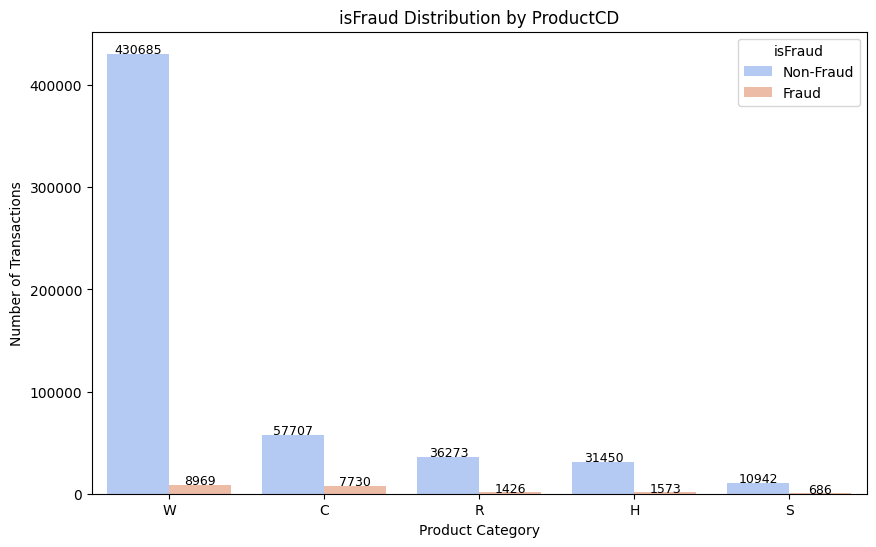

In [3]:
print("\n" + "="*50)
print("--- EDA: ProductCD ---")
print("="*50)

# 3.1 Distribution of ProductCD
print("\n3.1 Distribution of ProductCD:")
print(df['ProductCD'].value_counts())

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='ProductCD', data=df, order=df['ProductCD'].value_counts().index, palette='viridis')
plt.title('Distribution of ProductCD')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha="center")

plt.show()


# 3.2 ProductCD and TransactionAmt
print("\n3.2 TransactionAmt by ProductCD:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCD', y='TransactionAmt', data=df, order=df['ProductCD'].value_counts().index, palette='viridis')
plt.title('TransactionAmt by ProductCD')
plt.xlabel('Product Category')
plt.ylabel('Transaction Amount')
plt.yscale('log') # Log scale for better visualization of skewed amounts
plt.show()

# 3.3 ProductCD and isFraud
print("\n3.3 isFraud distribution by ProductCD:")
product_fraud_ratio = df.groupby('ProductCD')['isFraud'].value_counts(normalize=True).unstack().fillna(0) * 100
print(product_fraud_ratio)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ProductCD', hue='isFraud', data=df, order=df['ProductCD'].value_counts().index, palette='coolwarm')
plt.title('isFraud Distribution by ProductCD')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha="center", fontsize=9)

plt.show()


# 4. card1 - card6

Goal: Investigate card-related features, focusing on card1 for fraudulent activities and card4/card6 for brand/type distributions and their relation to fraud.

EDA Ideas:
- Top card1 IDs associated with fraud.
- Distribution of card4 (card brand) and card6 (card type).
isFraud distribution by card4 and card6.
- Check unique values and top frequencies for card2, card3, card5.


--- EDA: Card Features (card1-card6) ---

4.1 Top card1 IDs associated with Fraud:
card1
9633     719
9500     528
15885    436
9026     388
15063    319
2616     314
15066    313
9917     305
5812     297
6019     294
Name: count, dtype: int64

4.2 Distribution of card4 (Card Brand) and card6 (Card Type):


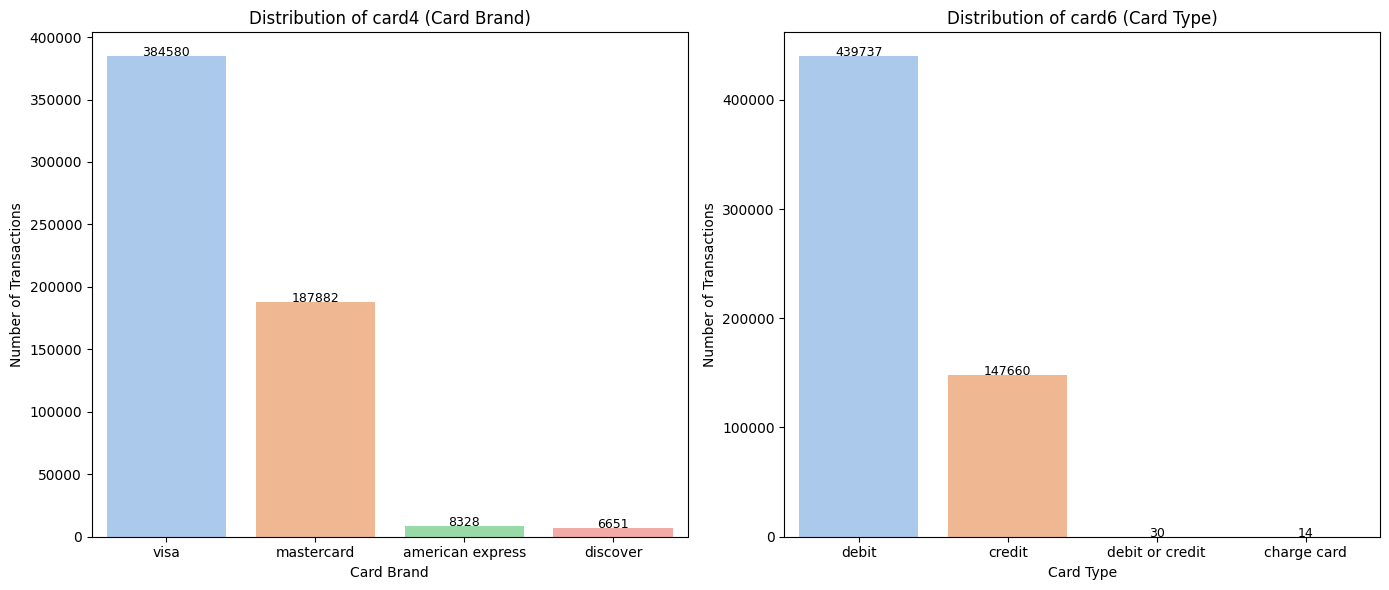


4.3 isFraud distribution by card4 and card6:


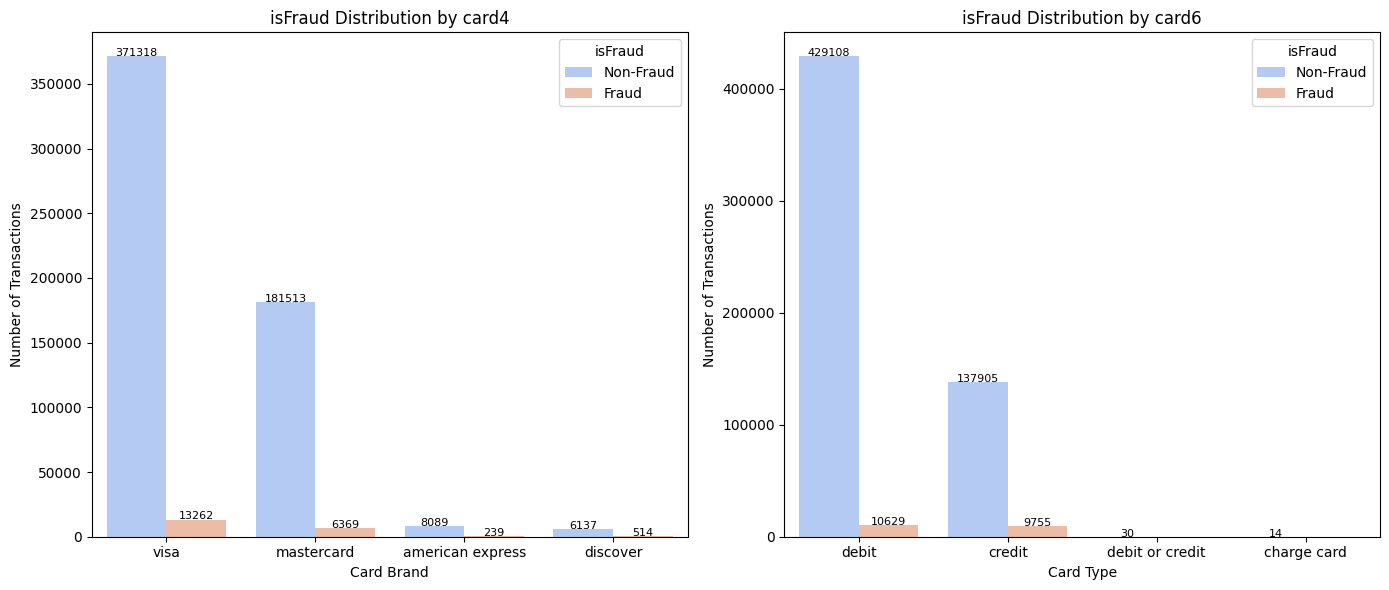

In [6]:
print("\n" + "="*50)
print("--- EDA: Card Features (card1-card6) ---")
print("="*50)

# 4.1 card1 (Card ID) analysis for fraudulent transactions
print("\n4.1 Top card1 IDs associated with Fraud:")
fraud_cards = df[df['isFraud'] == 1]['card1'].value_counts()
print(fraud_cards.head(10)) # Top 10 card1 IDs involved in fraud

# 4.2 Distribution of card4 (Card Brand) and card6 (Card Type)
print("\n4.2 Distribution of card4 (Card Brand) and card6 (Card Type):")
plt.figure(figsize=(14, 6))

# card4
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='card4', data=df, order=df['card4'].value_counts().index, palette='pastel')
plt.title('Distribution of card4 (Card Brand)')
plt.xlabel('Card Brand')
plt.ylabel('Number of Transactions')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha='center', fontsize=9)
    
#card 6
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='card6', data=df, order=df['card6'].value_counts().index, palette='pastel')
plt.title('Distribution of card6 (Card Type)')
plt.xlabel('Card Type')
plt.ylabel('Number of Transactions')
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()


# 4.3 card4/card6 and isFraud
print("\n4.3 isFraud distribution by card4 and card6:")
plt.figure(figsize=(14, 6))

# card4
plt.subplot(1, 2, 1)
ax3 = sns.countplot(x='card4', hue='isFraud', data=df, order=df['card4'].value_counts().index, palette='coolwarm')
plt.title('isFraud Distribution by card4')
plt.xlabel('Card Brand')
plt.ylabel('Number of Transactions')
plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])
for p in ax3.patches:
    height = p.get_height()
    if height > 0:
        ax3.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha='center', fontsize=8)

# card6
plt.subplot(1, 2, 2)
ax4 = sns.countplot(x='card6', hue='isFraud', data=df, order=df['card6'].value_counts().index, palette='coolwarm')
plt.title('isFraud Distribution by card6')
plt.xlabel('Card Type')
plt.ylabel('Number of Transactions')
plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])
for p in ax4.patches:
    height = p.get_height()
    if height > 0:
        ax4.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# 4.4 card2, card3, card5: Check unique values and their frequencies (if not too many)
# Plot only if cardinality is low enough to be meaningful
if df[col].nunique() < 50:  # Arbitrary threshold for plotting
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col, hue='isFraud', data=df, order=df[col].value_counts().head(10).index, palette='coolwarm')
    plt.title(f'Top 10 {col} Values by isFraud')
    plt.xlabel(col)
    plt.ylabel('Number of Transactions')
    plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width()/2., height + 5, f'{int(height)}', ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()


# 5. addr1, addr2

Goal: Investigate geographical distributions and their relation to fraud.

EDA Ideas:
- Top N distributions of addr1 and addr2.
- isFraud distribution for top N addr1 and addr2.


--- EDA: Address Features (addr1, addr2) ---

5.1 Top 10 addr1 and addr2 distributions:
addr1 Value Counts:
 addr1
others    326155
299.0      46324
325.0      42748
204.0      42018
264.0      39870
330.0      26284
315.0      23077
441.0      20825
272.0      20140
Name: count, dtype: int64

addr2 Value Counts:
 addr2
87.0     520481
other     66960
Name: count, dtype: int64


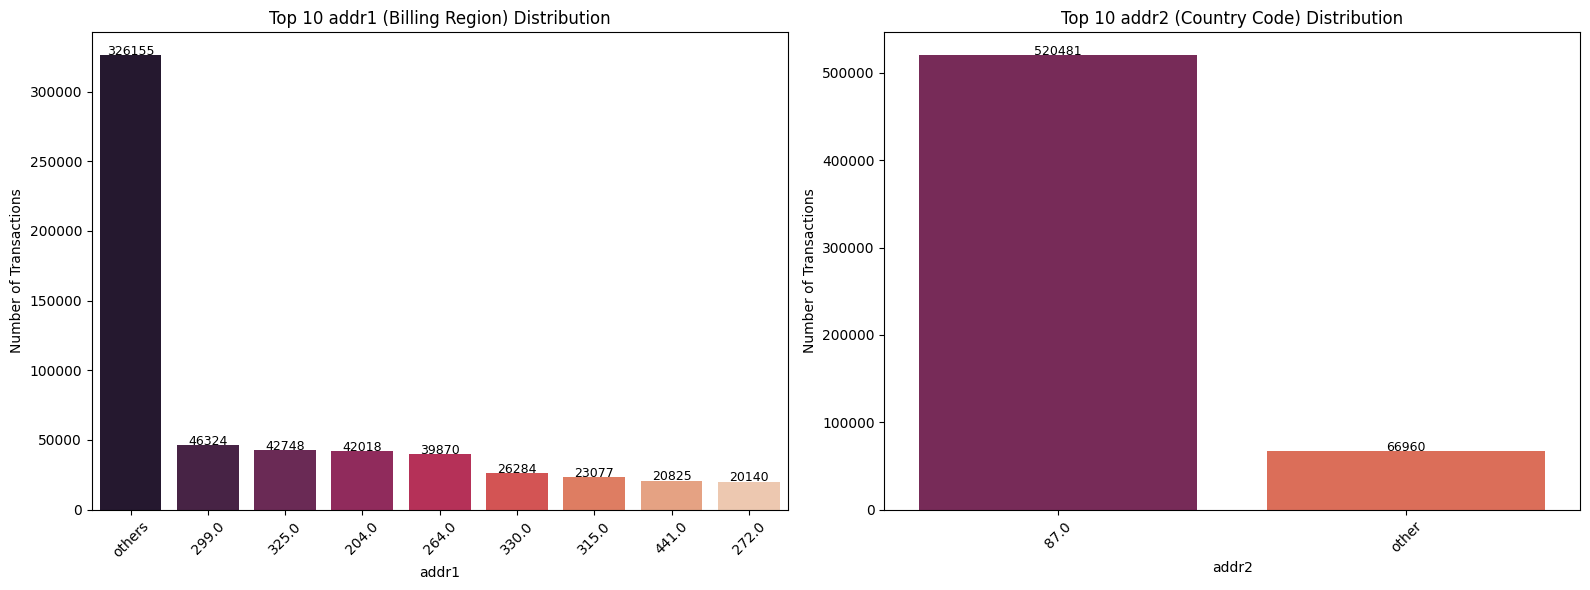


5.2 isFraud distribution by Top 10 addr1 and addr2:


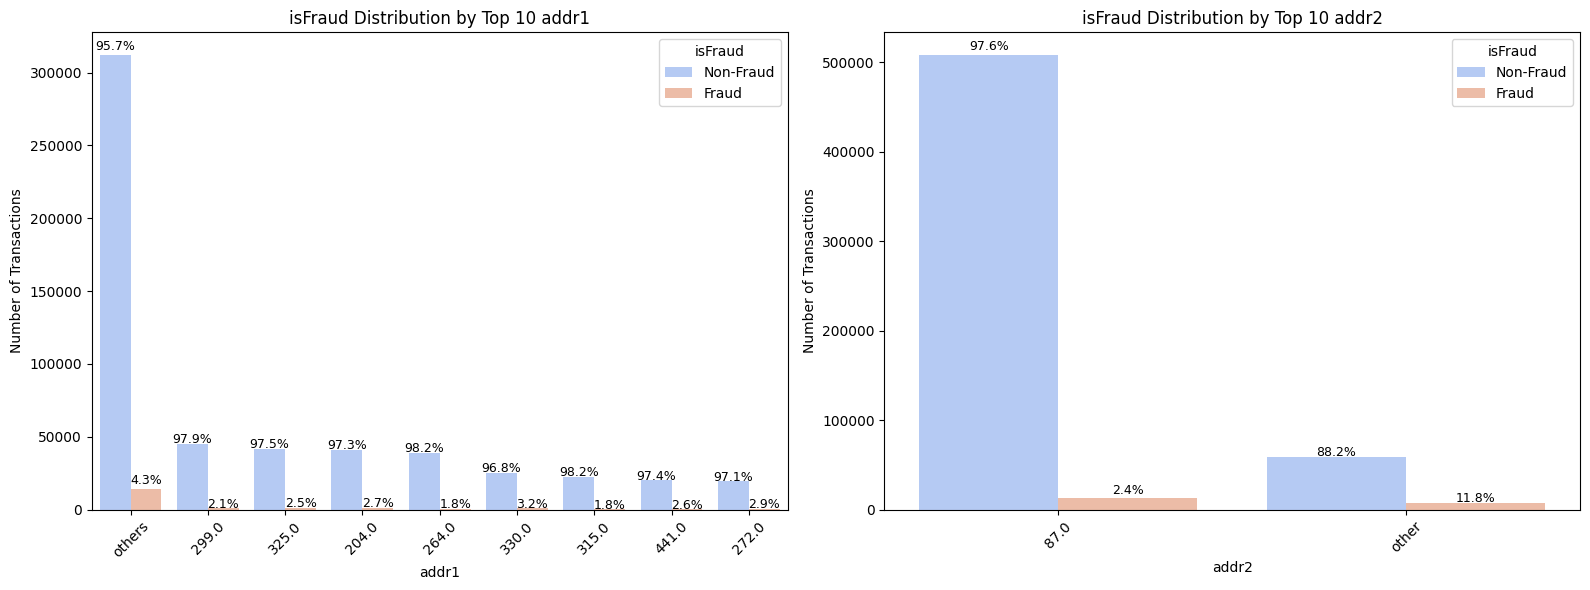

In [11]:
print("\n" + "="*50)
print("--- EDA: Address Features (addr1, addr2) ---")
print("="*50)

# 5.1 Distribution of addr1 and addr2
print("\n5.1 Top 10 addr1 and addr2 distributions:")
if 'addr1' in df.columns:
    print("addr1 Value Counts:\n", df['addr1'].value_counts().head(10))
if 'addr2' in df.columns:
    print("\naddr2 Value Counts:\n", df['addr2'].value_counts().head(10))

# Plotting top N address values with counts
plt.figure(figsize=(16, 6))
if 'addr1' in df.columns:
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x='addr1', data=df, order=df['addr1'].value_counts().head(10).index, palette='rocket')
    plt.title('Top 10 addr1 (Billing Region) Distribution')
    plt.xlabel('addr1')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha='center', fontsize=9)

if 'addr2' in df.columns:
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x='addr2', data=df, order=df['addr2'].value_counts().head(10).index, palette='rocket')
    plt.title('Top 10 addr2 (Country Code) Distribution')
    plt.xlabel('addr2')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    for p in ax2.patches:
        height = p.get_height()
        ax2.text(p.get_x() + p.get_width()/2., height + 100, f'{int(height)}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# 5.2 isFraud distribution by addr1 and addr2 (for top N)
print("\n5.2 isFraud distribution by Top 10 addr1 and addr2:")

plt.figure(figsize=(16, 6))

def add_percentage_labels(ax, df, category_col):
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        x = p.get_x() + p.get_width() / 2
    categories = [tick.get_text() for tick in ax.get_xticklabels()]
    hue_levels = sorted(df['isFraud'].unique())
    counts = df.groupby([category_col, 'isFraud']).size().unstack(fill_value=0)
    
    for i, category in enumerate(categories):
        if category not in counts.index:
            continue
        total = counts.loc[category].sum()
        for j, hue_val in enumerate(hue_levels):
            count = counts.loc[category, hue_val] if hue_val in counts.columns else 0
            if total > 0 and count > 0:
                percent = count / total * 100
                bar_width = 0.8 / len(hue_levels)
                x_pos = i - 0.4 + bar_width/2 + j * bar_width
                ax.text(x_pos, count + total*0.01, f'{percent:.1f}%', ha='center', fontsize=9, color='black')

if 'addr1' in df.columns:
    plt.subplot(1, 2, 1)
    top_addr1 = df['addr1'].value_counts().head(10).index
    df_addr1 = df[df['addr1'].isin(top_addr1)]
    ax1 = sns.countplot(x='addr1', hue='isFraud', data=df_addr1, order=top_addr1, palette='coolwarm')
    plt.title('isFraud Distribution by Top 10 addr1')
    plt.xlabel('addr1')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])

    add_percentage_labels(ax1, df_addr1, 'addr1')

if 'addr2' in df.columns:
    plt.subplot(1, 2, 2)
    top_addr2 = df['addr2'].value_counts().head(10).index
    df_addr2 = df[df['addr2'].isin(top_addr2)]
    ax2 = sns.countplot(x='addr2', hue='isFraud', data=df_addr2, order=top_addr2, palette='coolwarm')
    plt.title('isFraud Distribution by Top 10 addr2')
    plt.xlabel('addr2')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])

    add_percentage_labels(ax2, df_addr2, 'addr2')

plt.tight_layout()
plt.show()

# 6. dist1

Goal: Analyze the distribution of distance between addresses and its relationship with fraud.

EDA Ideas:
- Distribution of dist1.
- dist1 distribution by isFraud (e.g., box plot or KDE plot).


--- EDA: dist1 (Distance between addresses) ---

6.1 Distribution of dist1:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


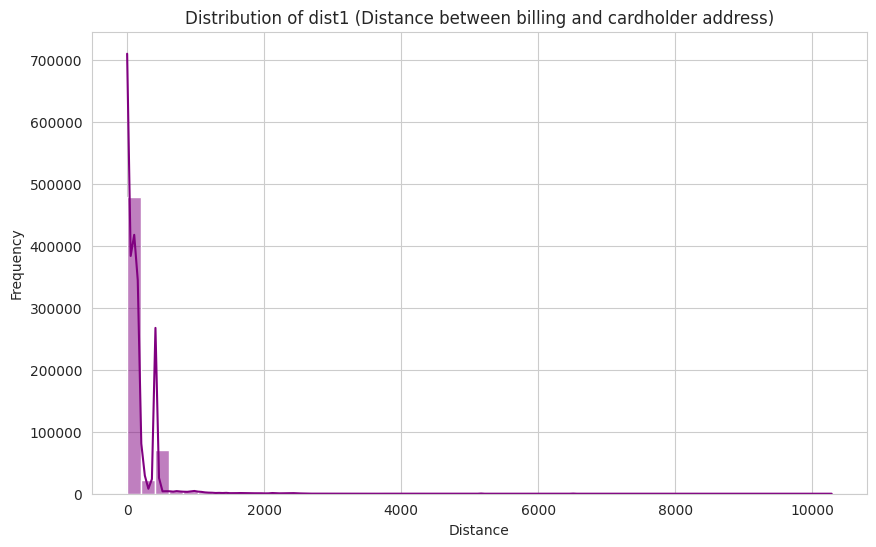


6.2 dist1 by isFraud:


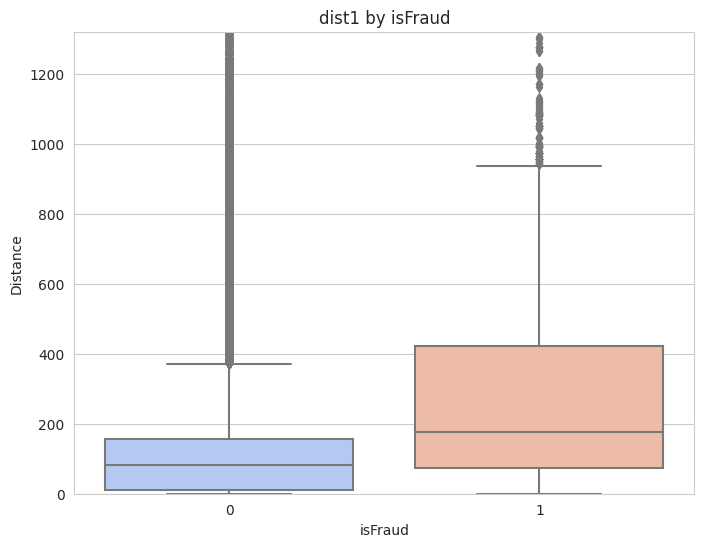

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


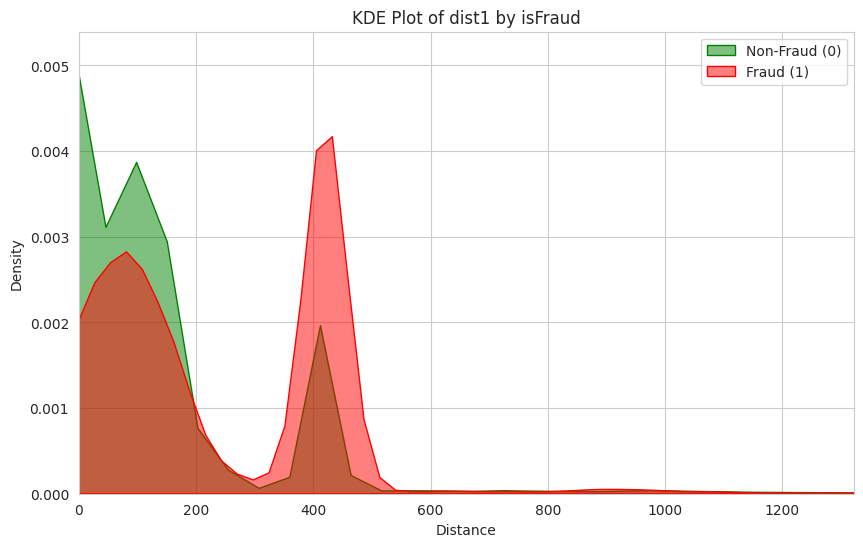

In [28]:
print("\n" + "="*50)
print("--- EDA: dist1 (Distance between addresses) ---")
print("="*50)

if 'dist1' in df.columns:
    # 6.1 Distribution of dist1
    print("\n6.1 Distribution of dist1:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['dist1'].dropna(), bins=50, kde=True, color='purple')
    plt.title('Distribution of dist1 (Distance between billing and cardholder address)')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.show()

    # 6.2 dist1 by isFraud
    print("\n6.2 dist1 by isFraud:")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='isFraud', y='dist1', data=df, palette='coolwarm')
    plt.title('dist1 by isFraud')
    plt.xlabel('isFraud')
    plt.ylabel('Distance')
    # Limit y-axis to 99th percentile for better visibility
    plt.ylim(0, df['dist1'].quantile(0.99) if df['dist1'].quantile(0.99) > 0 else df['dist1'].max())
    plt.show()

    # KDE plot for dist1 by isFraud for better comparison of distributions
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df['isFraud'] == 0]['dist1'].dropna(), label='Non-Fraud (0)', color='green', fill=True, alpha=0.5)
    sns.kdeplot(df[df['isFraud'] == 1]['dist1'].dropna(), label='Fraud (1)', color='red', fill=True, alpha=0.5)
    plt.title('KDE Plot of dist1 by isFraud')
    plt.xlabel('Distance')
    plt.ylabel('Density')
    # Limit x-axis to 99th percentile
    plt.xlim(0, df['dist1'].quantile(0.99) if df['dist1'].quantile(0.99) > 0 else df['dist1'].max())
    plt.legend()
    plt.show()
else:
    print("Column 'dist1' not found in DataFrame. Skipping EDA for dist1.")

# 7. P_emaildomain

Goal: Examine the distribution of email domains and their relationship with fraud.

EDA Ideas:
- Top N distributions of P_emaildomain.
- isFraud distribution for top N P_emaildomain.
- Fraud ratio per email domain.


--- EDA: P_emaildomain (Purchaser email domain) ---

7.1 Top 10 P_emaildomain distributions (including NaN):
P_emaildomain
others    256953
gmail     227760
yahoo     102728
Name: count, dtype: int64


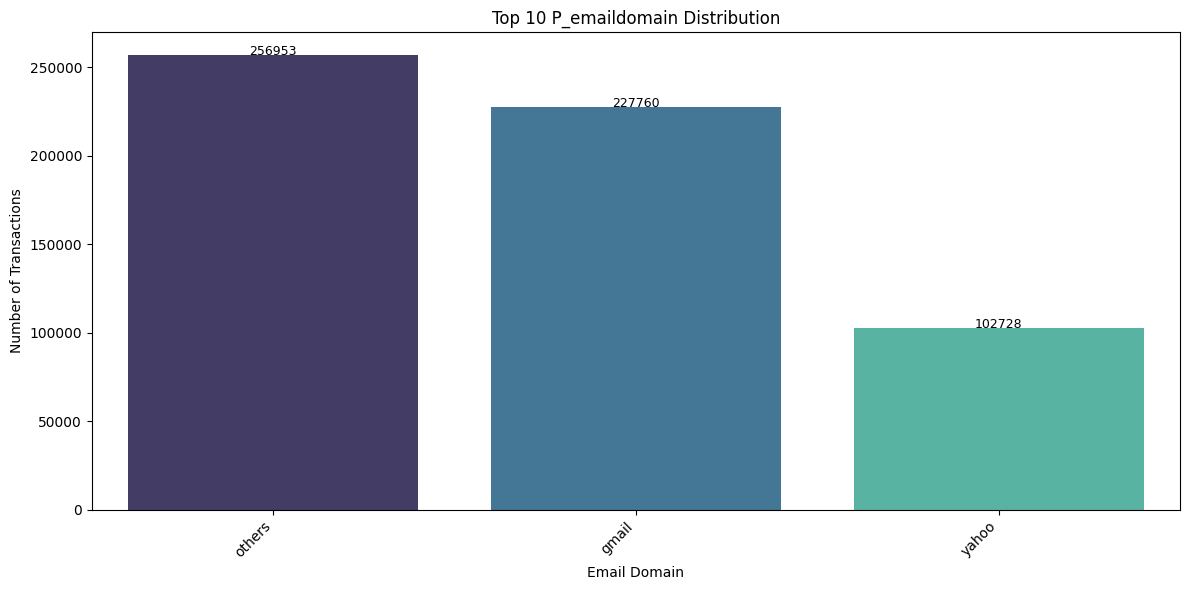


7.2 isFraud distribution by Top 10 P_emaildomain:


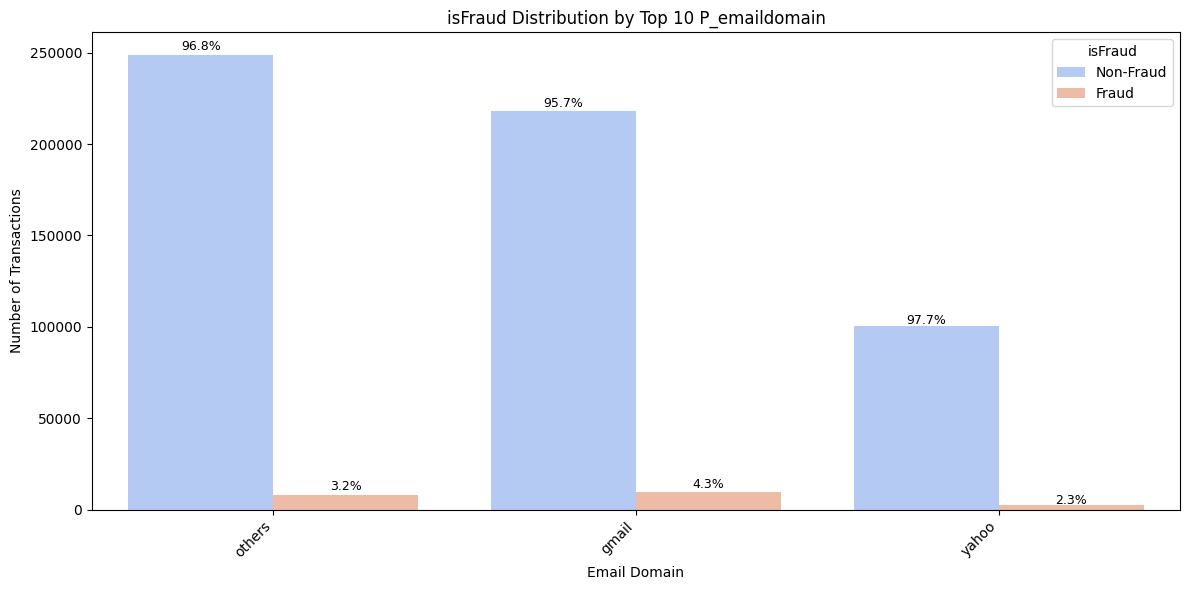


Top 10 P_emaildomain by Fraud Ratio:
P_emaildomain
gmail     0.043063
others    0.032154
yahoo     0.022526
Name: isFraud, dtype: float64


In [12]:
print("\n" + "="*50)
print("--- EDA: P_emaildomain (Purchaser email domain) ---")
print("="*50)

if 'P_emaildomain' in df.columns:
    # 7.1 Distribution of P_emaildomain
    print("\n7.1 Top 10 P_emaildomain distributions (including NaN):")
    print(df['P_emaildomain'].value_counts(dropna=False).head(10))

    plt.figure(figsize=(12, 6))
    top_domains = df['P_emaildomain'].value_counts(dropna=False).head(10).index
    ax1 = sns.countplot(x='P_emaildomain', data=df, order=top_domains, palette='mako')
    plt.title('Top 10 P_emaildomain Distribution')
    plt.xlabel('Email Domain')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45, ha='right')

    # Add counts on top of bars
    for p in ax1.patches:
        height = p.get_height()
        if height > 0:
            ax1.text(p.get_x() + p.get_width()/2, height + 5, f'{int(height)}', ha='center', fontsize=9)
    plt.tight_layout()
    plt.show()

    # 7.2 P_emaildomain and isFraud (with percentages)
    print("\n7.2 isFraud distribution by Top 10 P_emaildomain:")

    plt.figure(figsize=(12, 6))
    df_top = df[df['P_emaildomain'].isin(top_domains)]
    ax2 = sns.countplot(x='P_emaildomain', hue='isFraud', data=df_top, order=top_domains, palette='coolwarm')
    plt.title('isFraud Distribution by Top 10 P_emaildomain')
    plt.xlabel('Email Domain')
    plt.ylabel('Number of Transactions')
    plt.legend(title='isFraud', labels=['Non-Fraud', 'Fraud'])
    plt.xticks(rotation=45, ha='right')

    # Calculate counts per email domain and isFraud
    counts = df_top.groupby(['P_emaildomain', 'isFraud']).size().unstack(fill_value=0)

    # Add percentage labels on bars
    for i, domain in enumerate(top_domains):
        total = counts.loc[domain].sum()
        for j, fraud_val in enumerate([0, 1]):  # hue order: 0 = Non-Fraud, 1 = Fraud
            count = counts.loc[domain, fraud_val] if fraud_val in counts.columns else 0
            if total > 0 and count > 0:
                percent = count / total * 100
                # Calculate x-position for each bar inside grouped bars
                # Bar width approx 0.8, divided by number of hues = 2
                bar_width = 0.8 / 2
                x = i - 0.4 + bar_width/2 + j * bar_width
                ax2.text(x, count + total * 0.01, f'{percent:.1f}%', ha='center', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()

    # Ratio of fraud per email domain
    email_fraud_ratio = df.groupby('P_emaildomain')['isFraud'].mean().sort_values(ascending=False)
    print("\nTop 10 P_emaildomain by Fraud Ratio:")
    print(email_fraud_ratio.head(10))
else:
    print("Column 'P_emaildomain' not found in DataFrame. Skipping EDA for P_emaildomain.")


# 8. C1 - C14 (Count Features)

Goal: Analyze distributions, correlations, and relationship with fraud, with a focus on C1, C3, C7, C8.

EDA Ideas:
- Distributions of key C-columns (C1, C3, C7, C8) by isFraud.
- Box plots for key C-columns by isFraud.
- Correlation matrix for all C-columns.


--- EDA: C1-C14 (Count Features) ---

8.1 Distributions of C1, C3, C7, C8 by isFraud:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

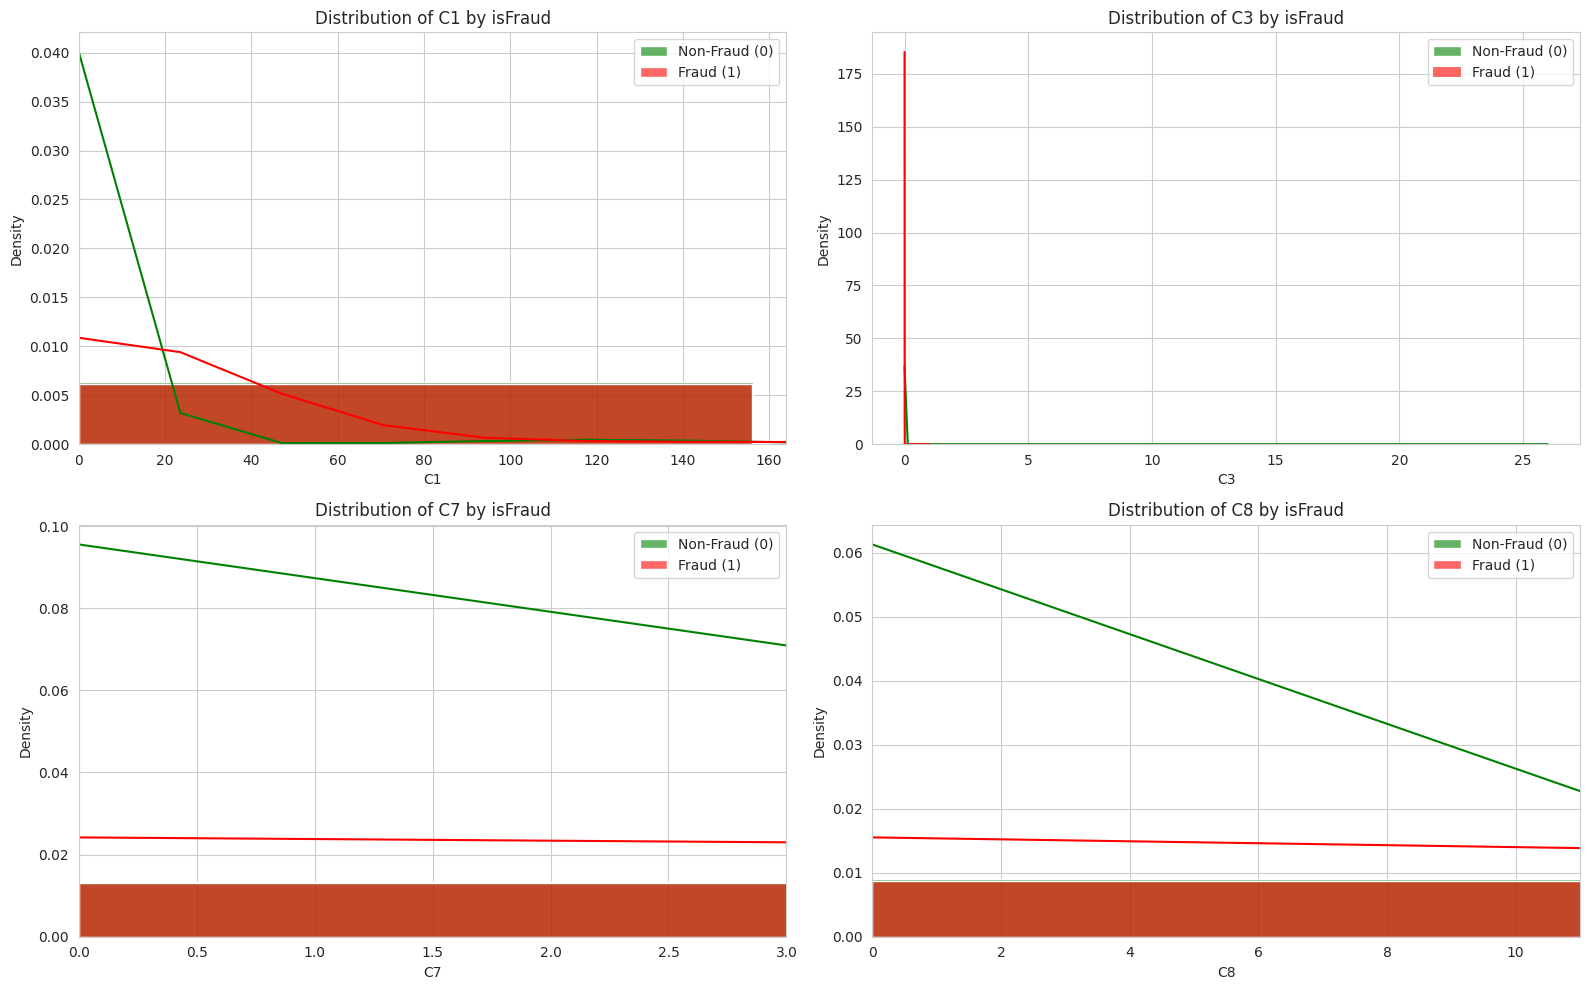

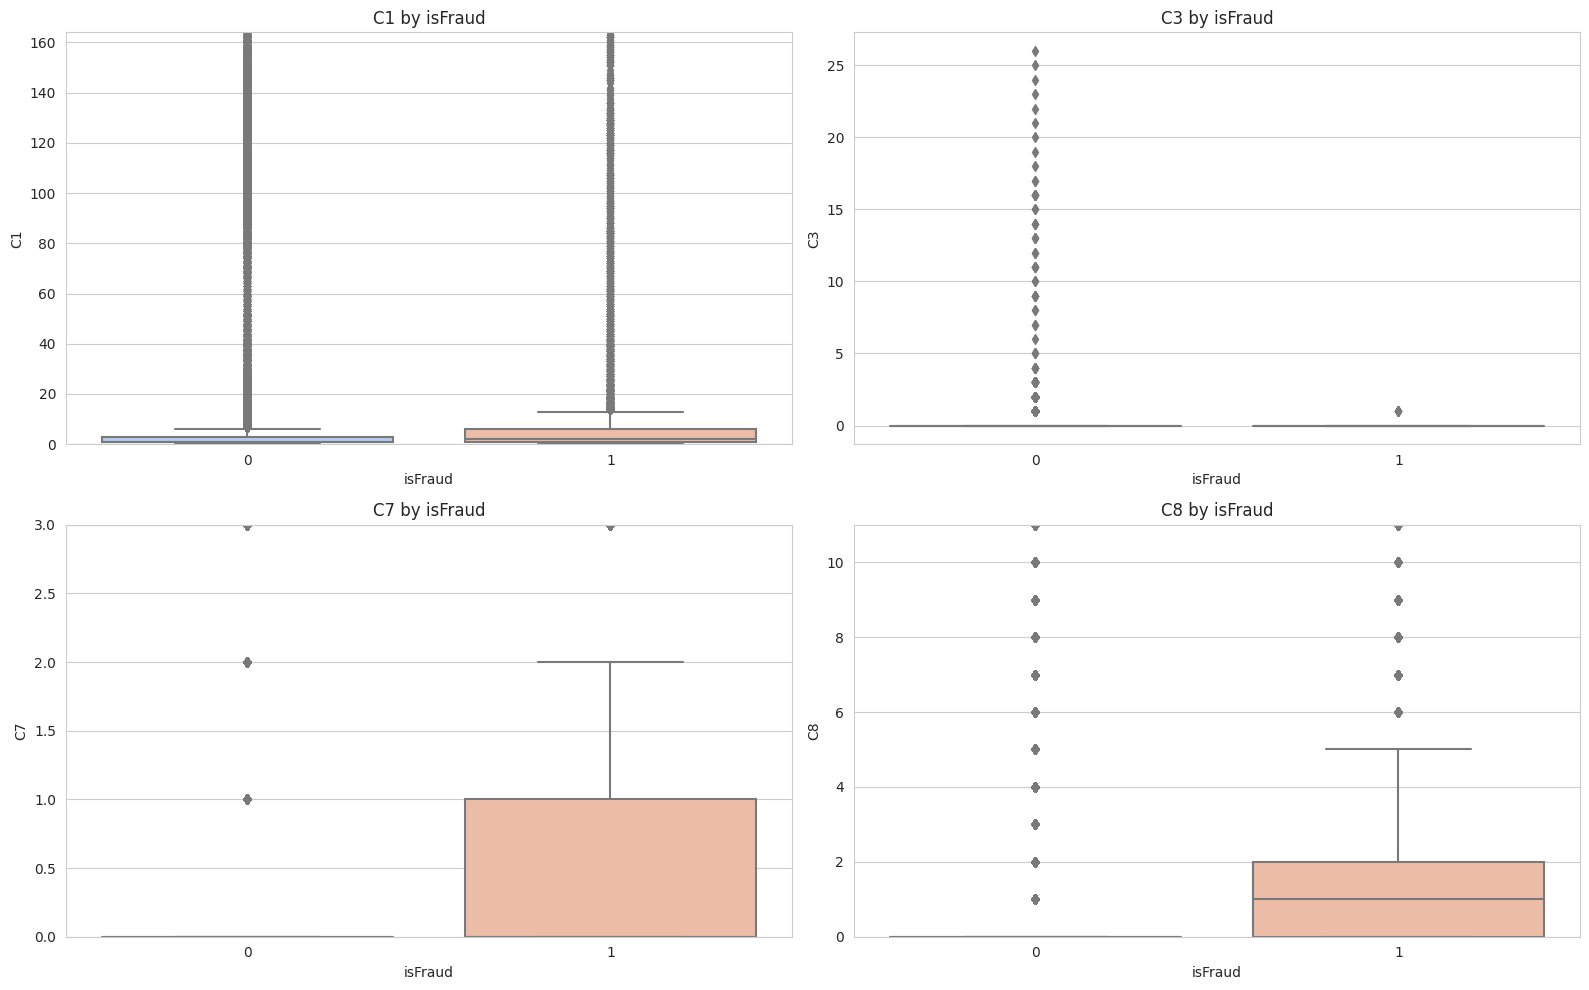


8.2 Correlation Matrix for C-columns:


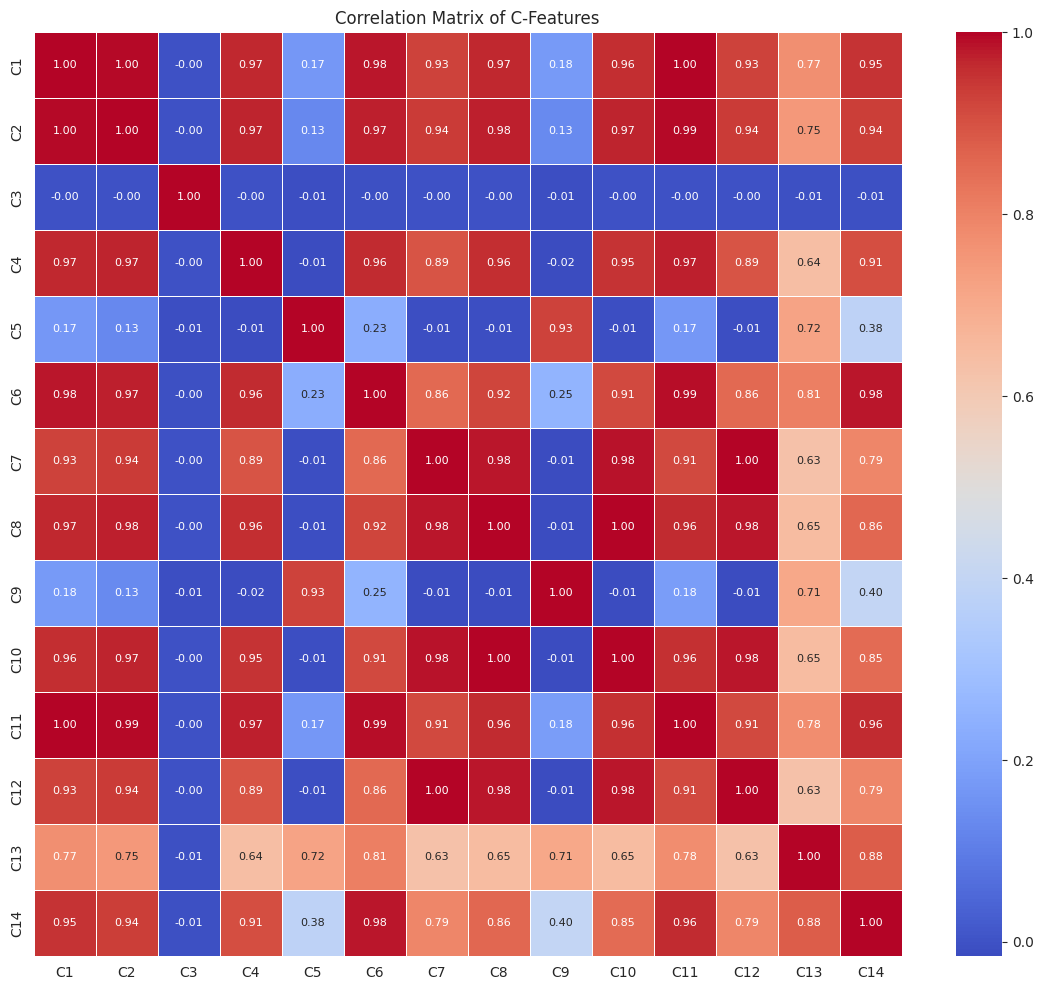

In [30]:
print("\n" + "="*50)
print("--- EDA: C1-C14 (Count Features) ---")
print("="*50)

c_cols = [f'C{i}' for i in range(1, 15) if f'C{i}' in df.columns]

if c_cols:
    # 8.1 Distributions of key C-columns by isFraud
    print("\n8.1 Distributions of C1, C3, C7, C8 by isFraud:")
    key_c_cols = ['C1', 'C3', 'C7', 'C8']
    key_c_cols = [col for col in key_c_cols if col in c_cols]

    if key_c_cols:
        plt.figure(figsize=(16, 10))
        for i, col in enumerate(key_c_cols):
            plt.subplot(2, 2, i + 1)
            sns.histplot(df[df['isFraud'] == 0][col].dropna(), bins=30, kde=True, color='green', label='Non-Fraud (0)', stat='density', alpha=0.6)
            sns.histplot(df[df['isFraud'] == 1][col].dropna(), bins=30, kde=True, color='red', label='Fraud (1)', stat='density', alpha=0.6)
            plt.title(f'Distribution of {col} by isFraud')
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.legend()
            # Limit x-axis for better visibility if values are highly skewed
            if df[col].nunique() > 10 and df[col].quantile(0.99) > 0:
                plt.xlim(0, df[col].quantile(0.99))
        plt.tight_layout()
        plt.show()

        # Box plots for key C-columns by isFraud
        plt.figure(figsize=(16, 10))
        for i, col in enumerate(key_c_cols):
            plt.subplot(2, 2, i + 1)
            sns.boxplot(x='isFraud', y=col, data=df, palette='coolwarm')
            plt.title(f'{col} by isFraud')
            plt.xlabel('isFraud')
            plt.ylabel(col)
            if df[col].nunique() > 10 and df[col].quantile(0.99) > 0:
                plt.ylim(0, df[col].quantile(0.99))
        plt.tight_layout()
        plt.show()
    else:
        print("Key C-columns (C1, C3, C7, C8) not found in DataFrame.")

    # 8.2 Correlation matrix for C-columns
    print("\n8.2 Correlation Matrix for C-columns:")
    if len(c_cols) > 1:
        c_corr_matrix = df[c_cols].corr()
        plt.figure(figsize=(14, 12))
        sns.heatmap(c_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title('Correlation Matrix of C-Features')
        plt.show()
    else:
        print("Not enough C-columns to plot correlation matrix.")
else:
    print("No C-columns (C1-C14) found in DataFrame. Skipping EDA for C-features.")

# 9. D1 - D5, D10 (Time-based Delta Features)

Goal: Analyze distributions, correlations, and relationship with fraud. Explore potential logical relationships with other features.

EDA Ideas:
- Distributions of D-columns by isFraud.
- Box plots for D-columns by isFraud.
- Correlation matrix for D-columns.
- Investigate relationships with other columns (e.g., D3 with Addr1, D5 with P_emaildomain).


--- EDA: D1-D5, D10 (Time-based Delta Features) ---

9.1 Distributions of D-columns by isFraud:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

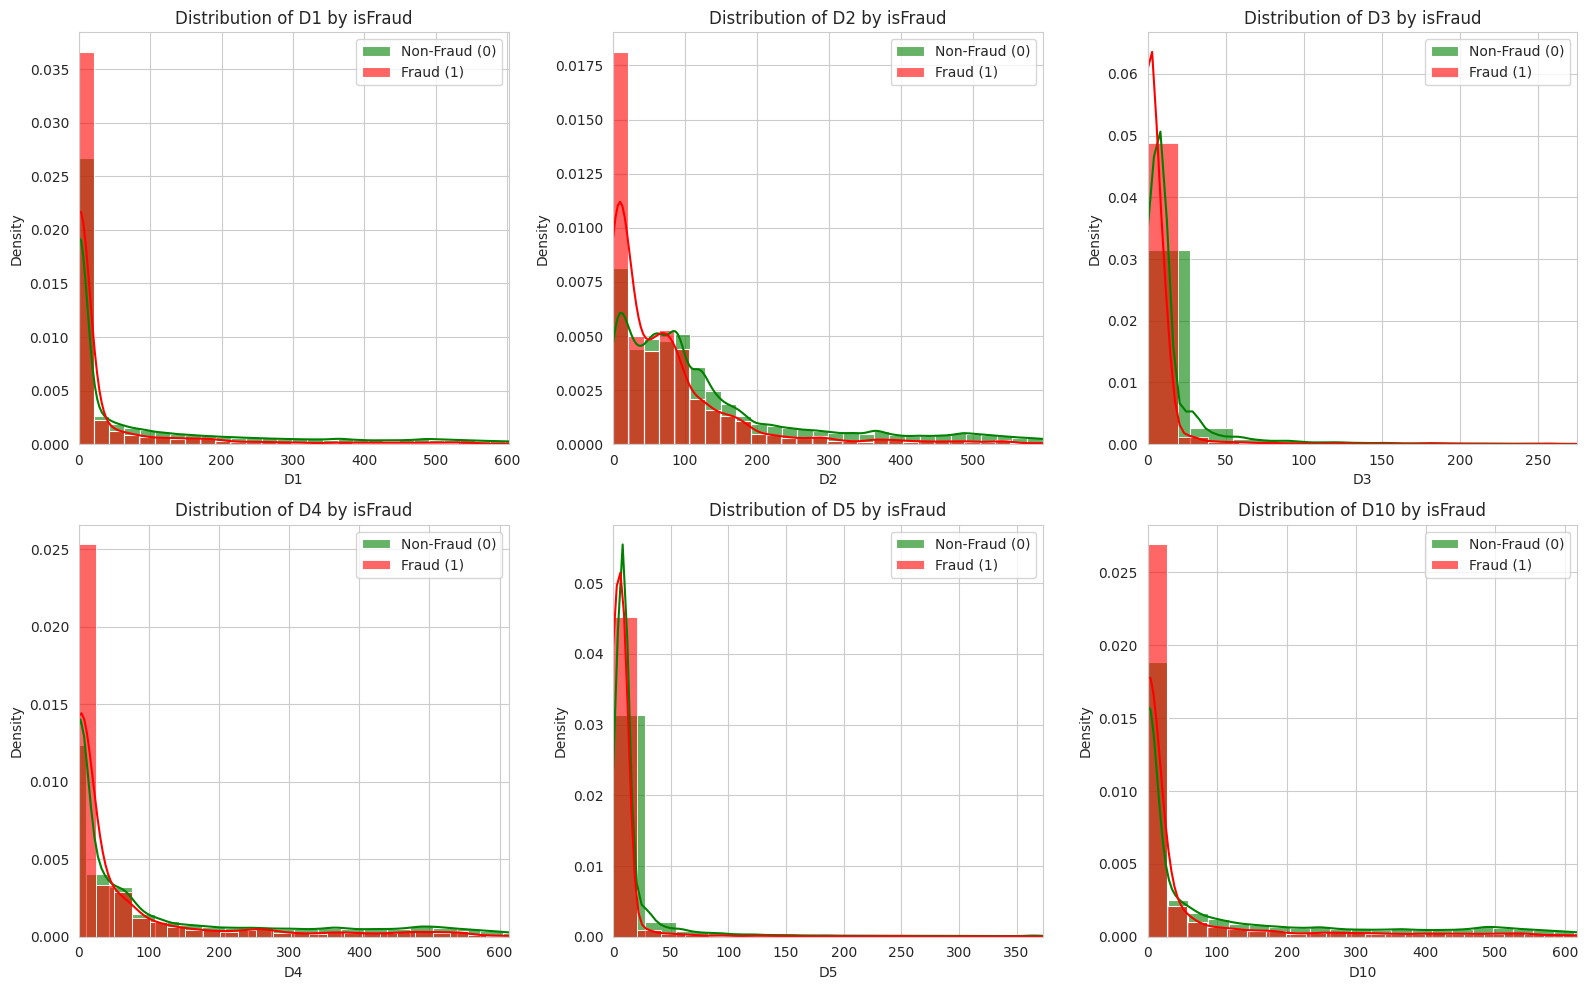

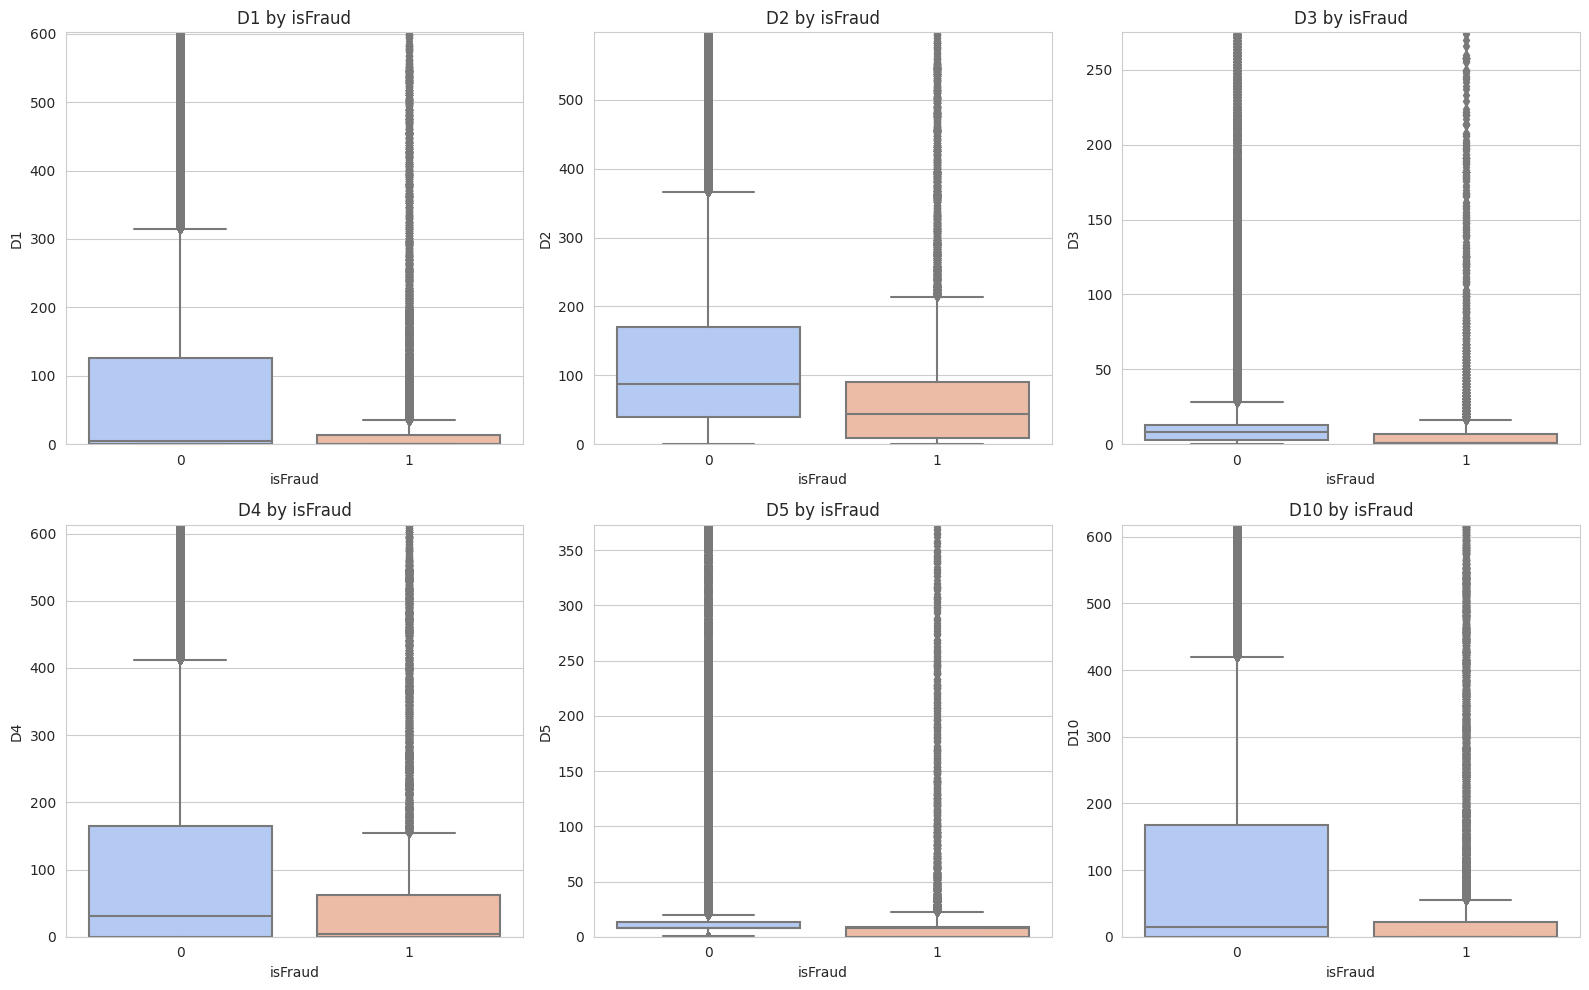


9.2 Correlation Matrix for D-columns:


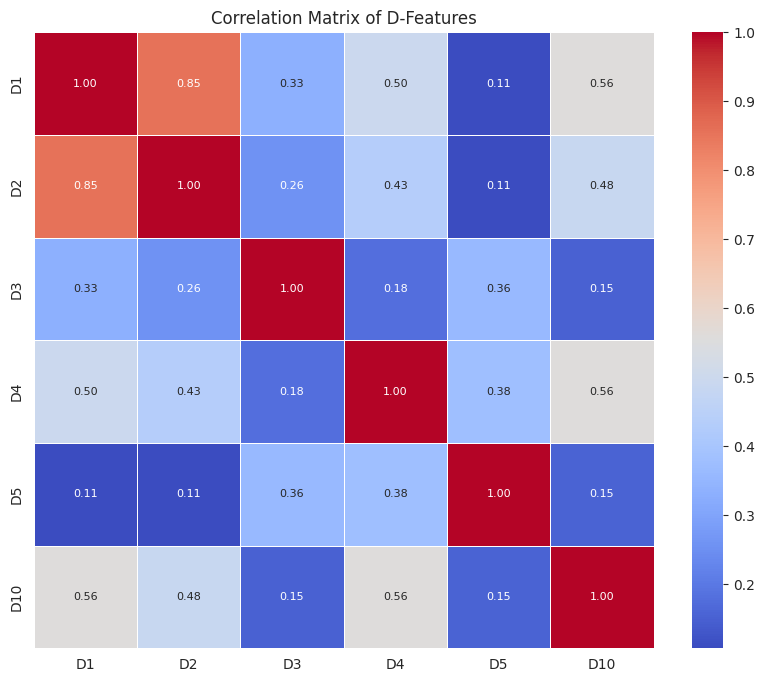


9.3 Investigating D-column relationships with other features (e.g., D3 with Addr1, D5 with P_emaildomain):
Required columns (D3, Addr1) not found for this analysis.

Average D5 by Top 5 P_emaildomain for Fraudulent Transactions:
P_emaildomain
yahoo     14.112360
others    11.226943
gmail     11.017843
Name: D5, dtype: float64


In [31]:
print("\n" + "="*50)
print("--- EDA: D1-D5, D10 (Time-based Delta Features) ---")
print("="*50)

d_cols = [f'D{i}' for i in range(1, 6) if f'D{i}' in df.columns] + \
         (['D10'] if 'D10' in df.columns else [])

if d_cols:
    # 9.1 Distributions of D-columns by isFraud
    print("\n9.1 Distributions of D-columns by isFraud:")
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(d_cols):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[df['isFraud'] == 0][col].dropna(), bins=30, kde=True, color='green', label='Non-Fraud (0)', stat='density', alpha=0.6)
        sns.histplot(df[df['isFraud'] == 1][col].dropna(), bins=30, kde=True, color='red', label='Fraud (1)', stat='density', alpha=0.6)
        plt.title(f'Distribution of {col} by isFraud')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        if df[col].nunique() > 10 and df[col].quantile(0.99) > 0:
            plt.xlim(0, df[col].quantile(0.99))
    plt.tight_layout()
    plt.show()

    # Box plots for D-columns by isFraud
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(d_cols):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x='isFraud', y=col, data=df, palette='coolwarm')
        plt.title(f'{col} by isFraud')
        plt.xlabel('isFraud')
        plt.ylabel(col)
        if df[col].nunique() > 10 and df[col].quantile(0.99) > 0:
            plt.ylim(0, df[col].quantile(0.99))
    plt.tight_layout()
    plt.show()

    # 9.2 Correlation matrix for D-columns
    print("\n9.2 Correlation Matrix for D-columns:")
    if len(d_cols) > 1:
        d_corr_matrix = df[d_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(d_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title('Correlation Matrix of D-Features')
        plt.show()
    else:
        print("Not enough D-columns to plot correlation matrix.")

    # 9.3 Check for relationships (e.g., D3 - Addr1/Addr2, D5 - P_emaildomain)
    # This involves looking at aggregated values, which can be indicative.
    print("\n9.3 Investigating D-column relationships with other features (e.g., D3 with Addr1, D5 with P_emaildomain):")
    if 'D3' in df.columns and 'Addr1' in df.columns:
        print("\nAverage D3 by Top 5 Addr1 for Fraudulent Transactions:")
        # Consider only top 5 Addr1 for fraudulent transactions for brevity
        top_fraud_addr1 = df[df['isFraud'] == 1]['Addr1'].value_counts().head(5).index
        if not top_fraud_addr1.empty:
            fraud_d3_addr1 = df[(df['isFraud'] == 1) & (df['Addr1'].isin(top_fraud_addr1))].groupby('Addr1')['D3'].mean().sort_values(ascending=False)
            print(fraud_d3_addr1)
        else:
            print("No fraudulent transactions found for top Addr1 values.")
    else:
        print("Required columns (D3, Addr1) not found for this analysis.")

    if 'D5' in df.columns and 'P_emaildomain' in df.columns:
        print("\nAverage D5 by Top 5 P_emaildomain for Fraudulent Transactions:")
        # Consider only top 5 P_emaildomain for fraudulent transactions for brevity
        top_fraud_email = df[df['isFraud'] == 1]['P_emaildomain'].value_counts().head(5).index
        if not top_fraud_email.empty:
            fraud_d5_email = df[(df['isFraud'] == 1) & (df['P_emaildomain'].isin(top_fraud_email))].groupby('P_emaildomain')['D5'].mean().sort_values(ascending=False)
            print(fraud_d5_email)
        else:
            print("No fraudulent transactions found for top P_emaildomain values.")
    else:
        print("Required columns (D5, P_emaildomain) not found for this analysis.")
else:
    print("No D-columns (D1-D5, D10) found in DataFrame. Skipping EDA for D-features.")

# 10. V-columns (Anonymized Features)

Goal: Acknowledge the instructions regarding V-columns.

EDA Ideas: As per your instruction, this part has already undergone PCA and a scree plot is available. Thus, no new code is provided for this section. If you later provide the principal components themselves (e.g., PC1, PC2), we can perform EDA on them.

In [32]:
print("\n" + "="*50)
print("--- EDA: V-columns (Anonymized Features) ---")
print("="*50)
print("As per instructions, the V-columns are anonymized and PCA has already been performed or a scree plot is available.")
print("Therefore, no further EDA code is provided for the V-columns in this step.")
print("If specific principal components (e.g., PC1, PC2, ..., PC14) were provided as new features, their distribution and correlation with isFraud could be analyzed.")


--- EDA: V-columns (Anonymized Features) ---
As per instructions, the V-columns are anonymized and PCA has already been performed or a scree plot is available.
Therefore, no further EDA code is provided for the V-columns in this step.
If specific principal components (e.g., PC1, PC2, ..., PC14) were provided as new features, their distribution and correlation with isFraud could be analyzed.
